In [1]:
import fastai
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
model = simple_cnn((3,16,16,2))

start_lr = 1e-7
learn = Learner(data, model, metrics=[accuracy])
cb = callbacks.LRFinderPlus(learn)
learn.fit(1, start_lr, callbacks=cb)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [10]:
path = untar_data(URLs.CIFAR)
data = ImageDataBunch.from_folder(path, valid_pct=0.20)
learn = create_cnn(data, models.resnet50, metrics=[accuracy])

start_lr = 1e-7
learn.fit(1, start_lr, callbacks=callbacks.LRFinderPlus(learn))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


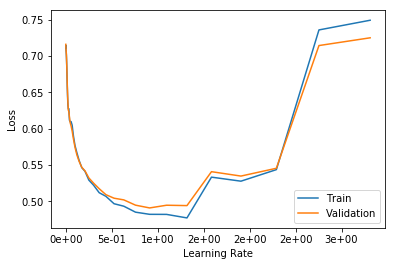

In [3]:
lrs = learn.recorder.lrs
skip_start = 10
skip_end = 5

lrs = lrs[skip_start:-skip_end] if skip_end > 0 else lrs[skip_start:]

losses = learn.recorder.losses
losses = losses[skip_start:-skip_end] if skip_end > 0 else losses[skip_start:]

val_losses = learn.recorder.val_losses
val_losses = val_losses[skip_start:-skip_end] if skip_end > 0 else val_losses[skip_start:]

_, ax = plt.subplots(1,1)
ax.plot(lrs, losses, label='Train')
ax.plot(lrs[1:], val_losses[:-1], label='Validation')

ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
ax.legend()